In [1]:
# import functions
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import warnings
import datetime

os.chdir(  "/Users/etmu9498/research/code/scripts")
import tc_metadata
import make_plots
import helper_fns
os.chdir(  "/Users/etmu9498/research/code/scripts/save-new-datasets")
import testing_distance_coords

New CRL File Created and Saved: crl-grace-08-18-eye-1.nc
New CRL File Created and Saved: crl-grace-08-18-eye-2.nc
New CRL File Created and Saved: crl-grace-08-18-eye-3.nc
New CRL File Created and Saved: crl-grace-08-19-eye-1.nc
New CRL File Created and Saved: crl-grace-08-19-eye-2.nc
New CRL File Created and Saved: crl-grace-08-19-eye-3.nc
New CRL File Created and Saved: crl-henri-08-20-eye-1.nc
New CRL File Created and Saved: crl-henri-08-20-eye-3.nc
New CRL File Created and Saved: crl-henri-08-21-eye-1.nc
New CRL File Created and Saved: crl-henri-08-21-eye-2.nc
New CRL File Created and Saved: crl-henri-08-21-eye-3.nc
New CRL File Created and Saved: crl-ida-08-27-eye-1.nc
New CRL File Created and Saved: crl-ida-08-27-eye-2.nc
New CRL File Created and Saved: crl-ida-08-27-eye-7.nc
New CRL File Created and Saved: crl-ida-08-29-eye-2.nc
New CRL File Created and Saved: crl-sam-09-26-eye-1.nc
New CRL File Created and Saved: crl-sam-09-26-eye-2.nc
New CRL File Created and Saved: crl-sam-09-

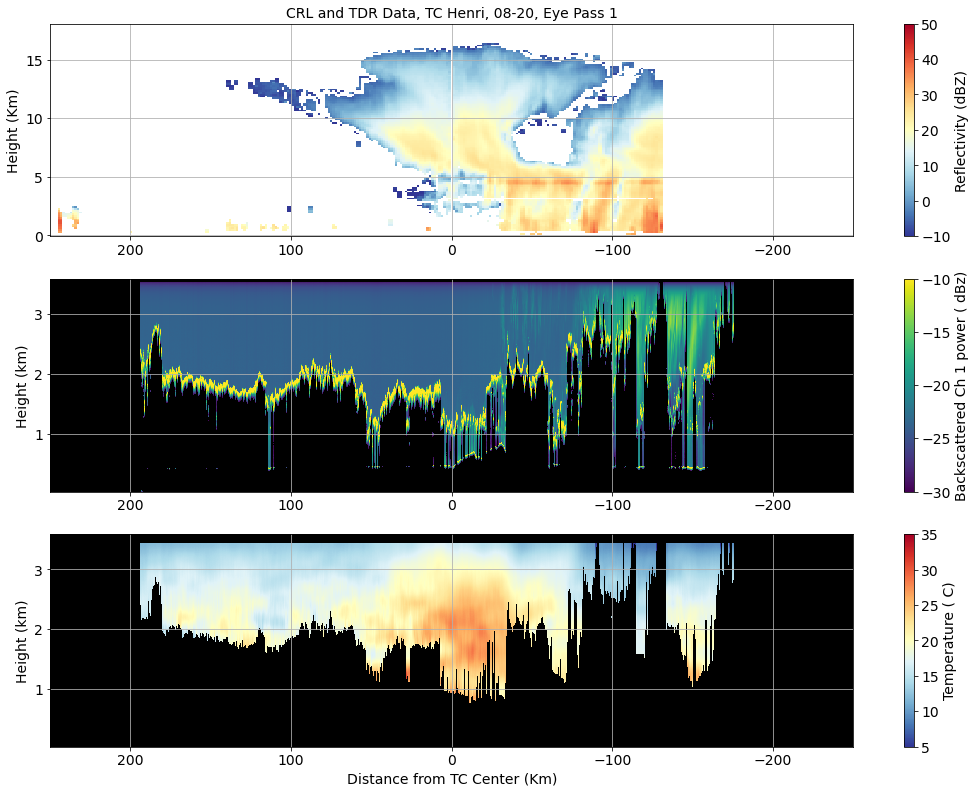

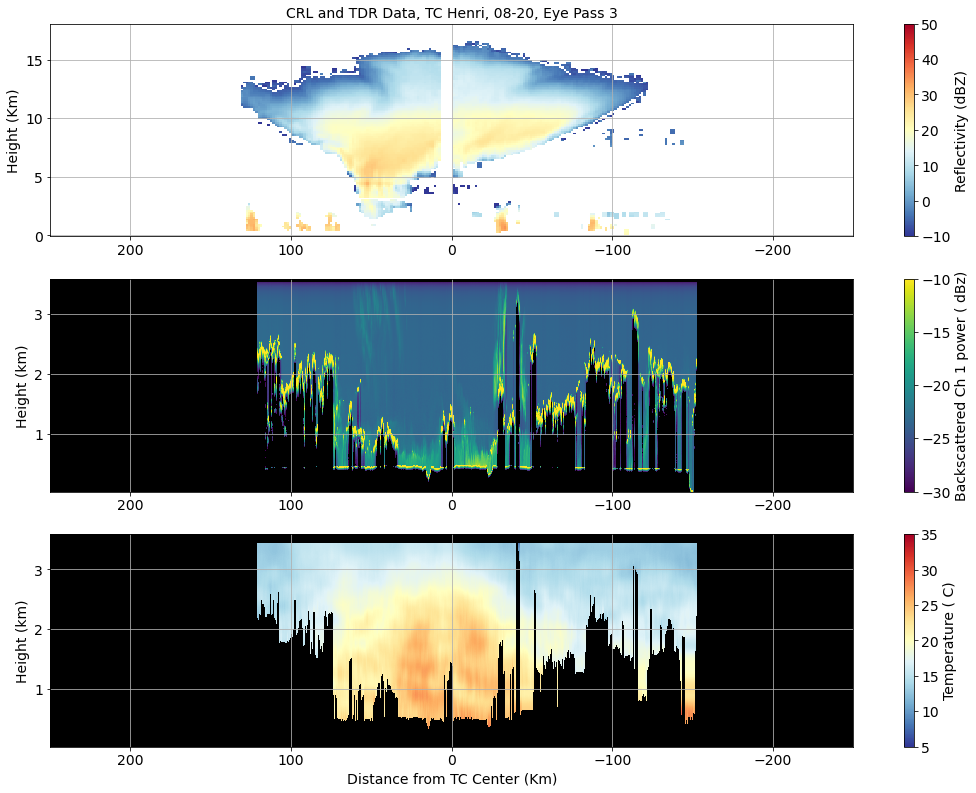

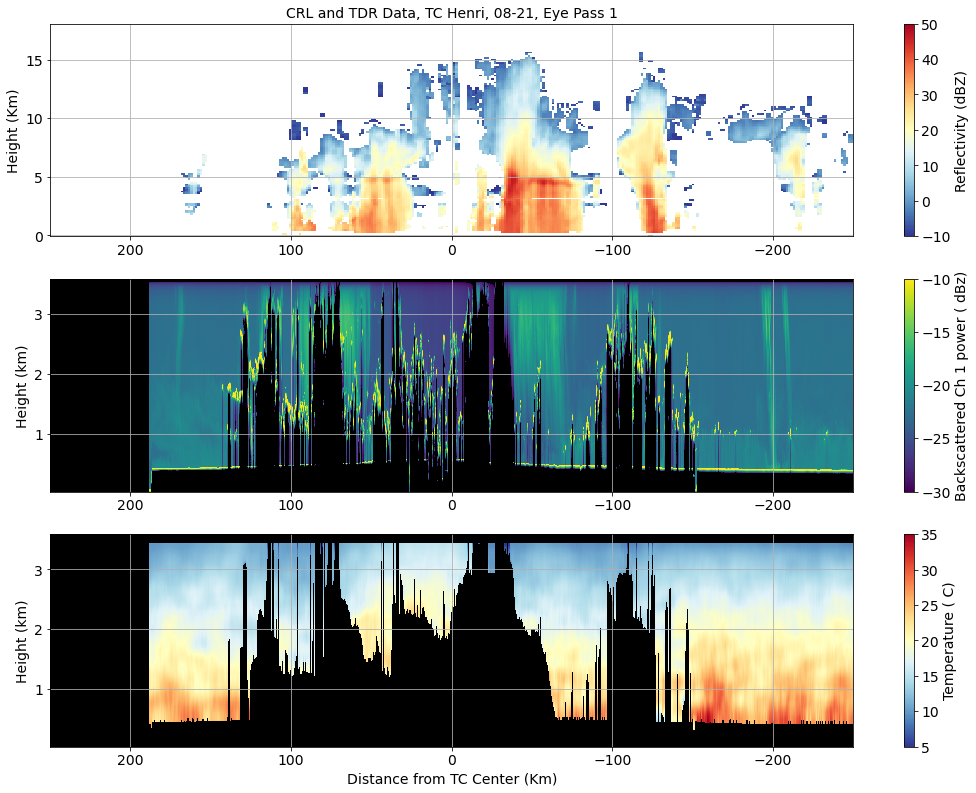

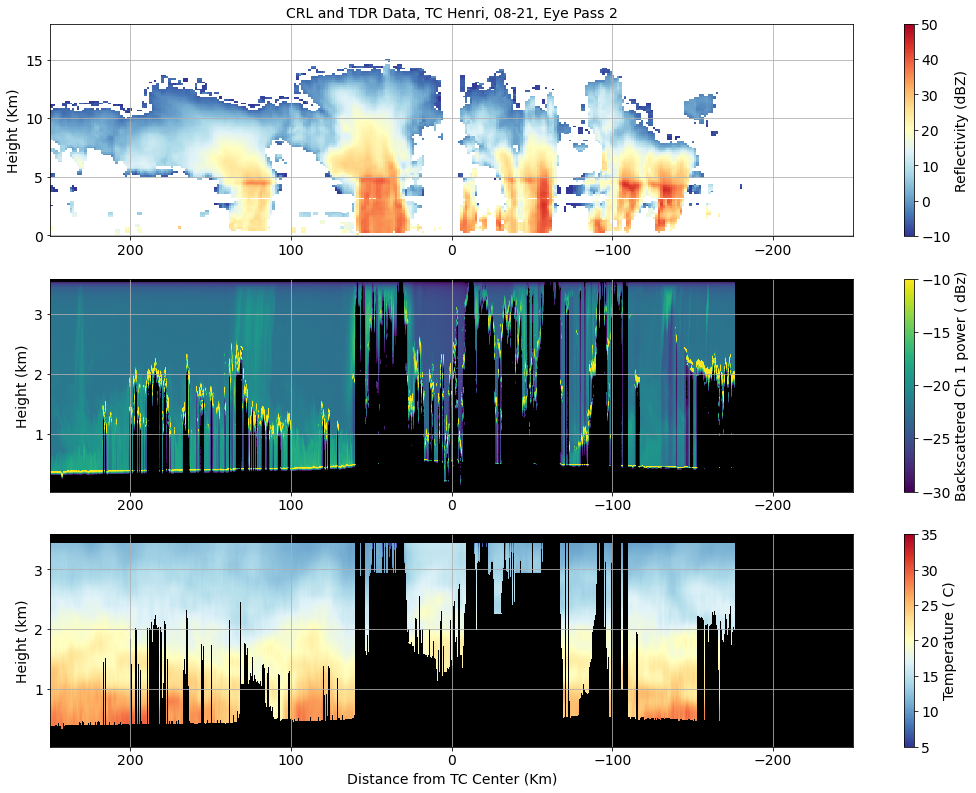

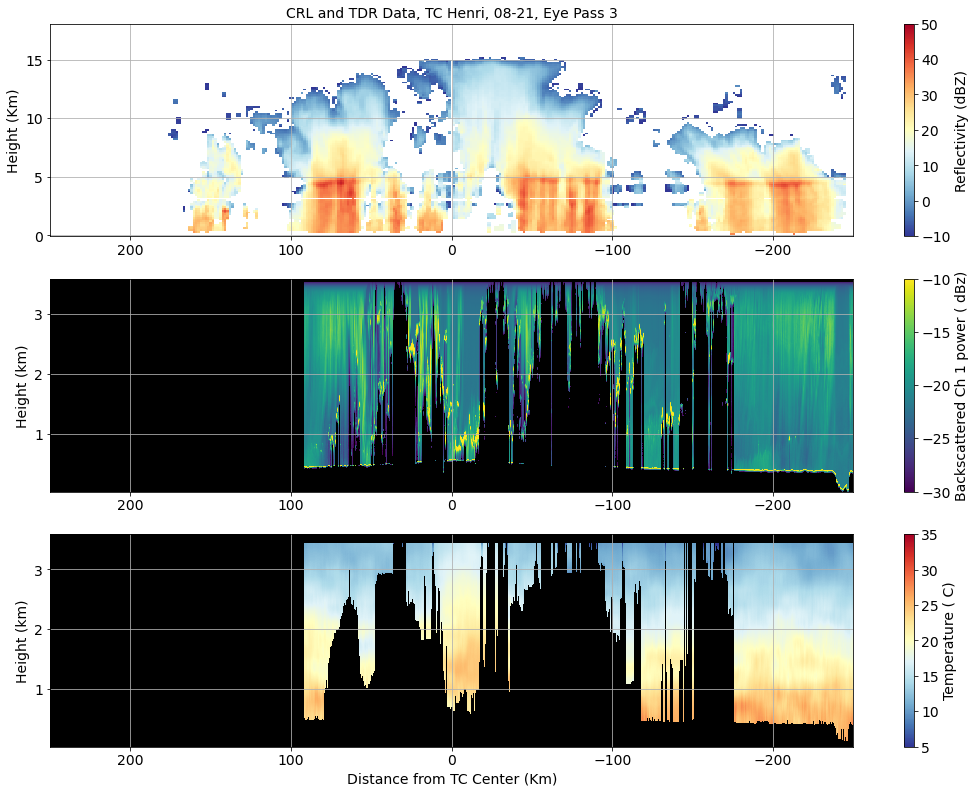

In [3]:
# %%time
# testing the auto function!! plz let this work lol
# testing_distance_coords.comparison_plots(tc='henri', shift_crl_dist=True)

testing_distance_coords.distance_plots( padding=250, tc='henri', shift_crl_dist=True, in_situ=False)

In [25]:
# get metadata for a specific tc example 
tcname = 'sam'
dataset = 2
metadata = tc_metadata.all_data( tc= tcname)

crl_name = tc_metadata.choose_crl_date( metadata[ 'dates'][ dataset], metadata[ 'crl_list'])
in_situ_name = tc_metadata.choose_in_situ_date( metadata[ 'dates'][ dataset], metadata[ 'in_situ_list'])
inbound_name, outbound_name = tc_metadata.choose_tdr_data( tcname, metadata[ 'tdr_list'], dataset)

# metadata

# load crl data
os.chdir( metadata[ 'crl_path'])
crl_data = xr.open_dataset( crl_name)
print( crl_name)

# load tdr data
os.chdir( metadata['tdr_path'])
inbound_data = xr.open_dataset( inbound_name)
outbound_data = xr.open_dataset( outbound_name)

# crl_data

P3_20210926H1_220900-255058.cdf


In [26]:
# goal 1: find the lat / lon limits for the crl dataset (not eye limits, but just general, non overlap limits!)

# using lat or lon?
i1 = metadata[ 'crl_range'][dataset][0]
i2 = metadata[ 'crl_range'][dataset][1]
xtype = metadata[ 'xtype'][dataset]

if xtype == 'lon':
    lim1 = crl_data.Lon[ i1]
    lim2 = crl_data.Lon[ i2]
    inboundx = inbound_data.longitude
    outboundx = outbound_data.longitude
elif xtype == 'lat':
    lim1 = crl_data.Lat[ i1]
    lim2 = crl_data.Lat[ i2]
    inboundx = inbound_data.latitude
    outboundx = outbound_data.latitude
else:
    print( 'update the xtype list in tc_metadata.all_data()!')

'''
print( lim1.values)
print( lim2.values)

print( inboundx.values)
print( inbound_data.radius.values)
# print( outboundx.values)
print( i1)
print( i2)
'''

# goal 2: try to find the closest lat / lon values in the tdr dataset
# try to reuse code found in other programs: maybe add this closest value to helper_fns.py!

# find the closest values for both inbound and outbound data
# then, pick the closest dataset from the two! 
i1, x1 = helper_fns.xr_closest_val( inboundx, lim1 )
i2, x2 = helper_fns.xr_closest_val( outboundx, lim1 )
# find the closest value between the two! 
# x1 is closest case
if np.abs( np.subtract( x1, lim1)) < np.abs( np.subtract( x2, lim1)):
    in_i = i1
    in_x = x1
    in_dataset = 'inbound'
# x2 is closest case
else:
    in_i = i2
    in_x = x2
    in_dataset = 'outbound'

print( in_i)
print( in_x)
print( in_dataset)

# repeat this process for the second crl limit
i1, x1 = helper_fns.xr_closest_val( inboundx, lim2)
i2, x2 = helper_fns.xr_closest_val( outboundx, lim2)
# find the closest value between the two! x1 is closest case
if np.abs( np.subtract( x1, lim2)) < np.abs( np.subtract( x2, lim2)):
    out_i = i1
    out_x = x1
    out_dataset = 'inbound'

# x2 is closest case
else:
    out_i = i2
    out_x = x2
    out_dataset = 'outbound'
    
print( out_i)
print( out_x)
print( out_dataset)

# goal 3: find the distances that correspond to the closest lat / lons found above!
# the - sign in front of the inbound data is a carry over from make_plots code: one of the axes needed to get flipped!

# setting the distance for the first crl limit
if in_dataset == 'inbound':
    in_dist = - inbound_data.radius[ in_i]
else:
    in_dist = outbound_data.radius[ in_i]

# repeat for the second crl limit
if out_dataset == 'inbound':
    out_dist = - inbound_data.radius[ out_i]
else:
    out_dist = outbound_data.radius[ out_i]
    
print( in_dist.values)
print( out_dist.values)

# goal 4: make a distance array for the crl data given the distance tdr limits
i1 = metadata[ 'crl_range'][dataset][0]
i2 = metadata[ 'crl_range'][dataset][1]

crl_distance = np.linspace( in_dist, out_dist, num= i2-i1)
print( len( crl_distance))
print( crl_distance)

112
-49.94889831542969
inbound
96
-51.72439956665039
outbound
-169.5
145.5
1200
[-169.5        -169.23728107 -168.97456214 ...  144.97456214  145.23728107
  145.5       ]


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4407: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4407: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4407: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis 

(-169.5, 145.5)

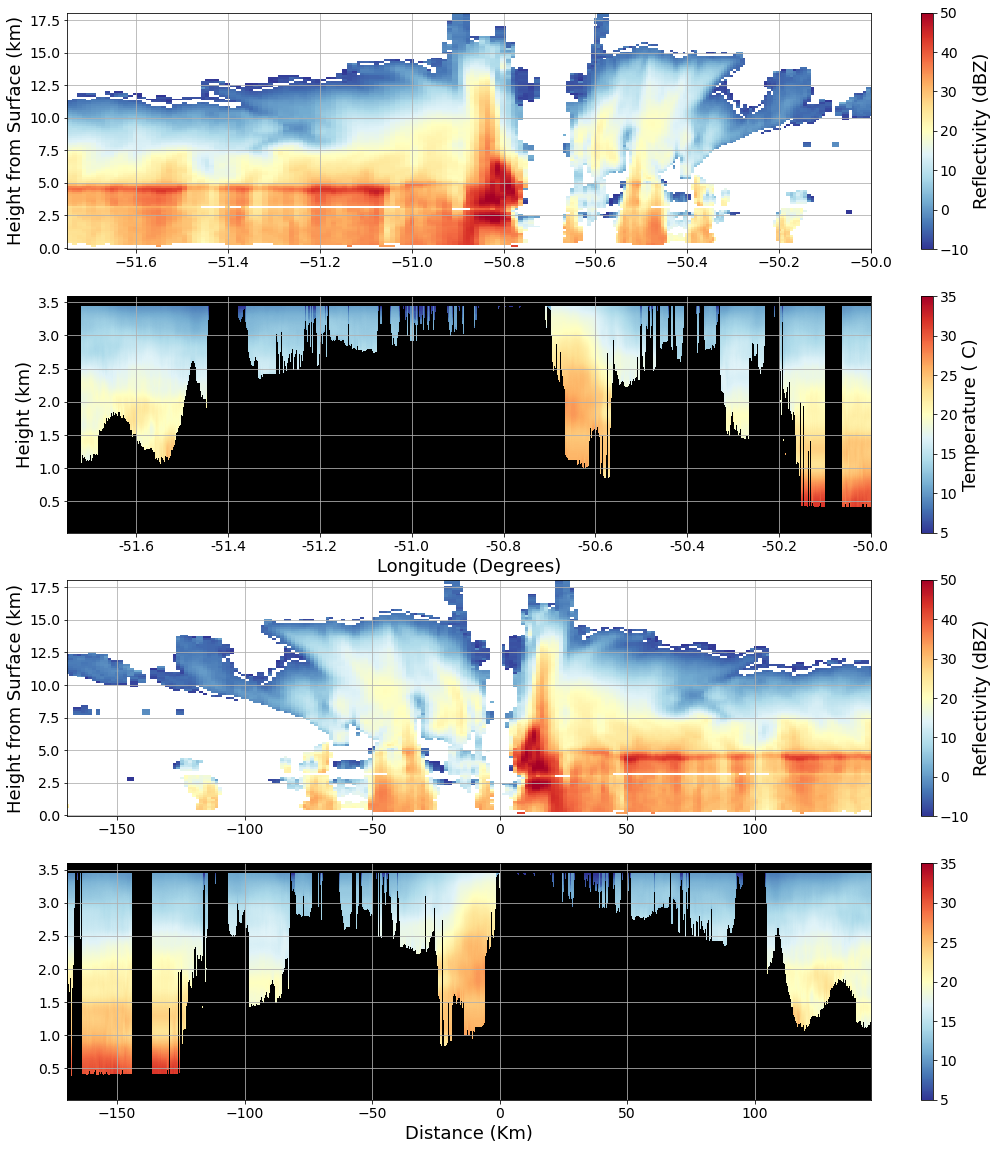

In [27]:
# comparing lat / lon crl and tdr plots to new distance plots!
plt.figure( figsize=(18,20))

plt.subplot(411)
make_plots.plot_tdr( metadata['tdr_path'], inbound_name, outbound_name, xtype)
# plt.xlim( [-50, -51.65])
plt.xlim( metadata[ 'xlims'][ dataset] )

plt.subplot(412)
make_plots.plot_T( metadata[ 'crl_path'], crl_name, i1, i2, xtype)
plt.xlabel( 'Longitude (Degrees)')
# plt.xlim( [-50, -51.65])
plt.xlim( metadata[ 'xlims'][ dataset] )

plt.subplot( 414)
temp = crl_data.T[i1:i2, :].where( crl_data.T[i1:i2, :].values < 50).transpose()
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_distance, - crl_data.H, temp, cmap=color_map, vmin=5, vmax=35)
plt.colorbar()
ax = plt.gca()
ax.set_facecolor('k')
helper_fns.change_font_sizes()
plt.grid('on')
plt.xlabel( "Distance (Km)")
plt.xlim( [in_dist, out_dist])

plt.subplot( 413)
make_plots.plot_tdr( metadata['tdr_path'], inbound_name, outbound_name, 'dist')
plt.xlim( [in_dist, out_dist])


In [28]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

In [29]:
# example #2: trying to replicate the case above, but using the newly created crl and tdr datasets!

# load new datasets
tdr_name, crl_name = tc_metadata.choose_new_data( tcname, dataset)

tdr_path = "/Users/etmu9498/research/data/tdr-new"
crl_path = "/Users/etmu9498/research/data/crl-new"

os.chdir( tdr_path)
new_tdr = xr.open_dataset( tdr_name)

os.chdir( crl_path)
new_crl = xr.open_dataset( crl_name)

In [30]:
# repeat goal 1: find the lat / lon limits for the crl dataset (not eye limits, but just general, non overlap limits!)

# using lat or lon?
i1 = 0
i2 = len( new_crl.time) - 1
xtype = metadata[ 'xtype'][dataset]

if xtype == 'lon':
    lim1 = new_crl.Lon[ i1]
    lim2 = new_crl.Lon[ i2]
    tdrx = new_tdr.longitude
elif xtype == 'lat':
    lim1 = new_crl.Lat[ i1]
    lim2 = new_crl.Lat[ i2]
    tdrx = new_tdr.latitude
else:
    print( 'update the xtype list in tc_metadata.all_data()!')

print( lim1.values)
print( lim2.values)

# print( tdrx.values)
# print( new_tdr.distance.values)
print( i1)
print( i2)

# goal 2: try to find the closest lat / lon values in the tdr dataset
# this is sooo much easier when only searching through one dataset!

i1, x1 = helper_fns.xr_closest_val( tdrx, lim1 )
i2, x2 = helper_fns.xr_closest_val( tdrx, lim2)

print( i1)
print( x1)
print( i2)
print( x2)

# goal 3: find the distances that correspond to the closest lat / lons found above!

# actually, no - sign is needed in this code! yay. Can change - sign in save_tdr_data.py
# the - sign in front of the outbound data is a carry over from save_tdr_data.py code
# maybe change this to - inbound_data to match make_plots code?

# setting the distance for the first crl limit
dist1 = new_tdr.distance[ i1]
# second limit
dist2 = new_tdr.distance[ i2]

print( dist1.values)
print( dist2.values)


# goal 4: make a distance array for the crl data given the distance tdr limits
i1 = metadata[ 'crl_range'][dataset][0]
i2 = metadata[ 'crl_range'][dataset][1]

crl_distance = np.linspace( dist1, dist2, num= i2-i1)
print( len( crl_distance))
print( crl_distance)

-49.951736
-51.718815
0
1199
280
-49.94889831542969
71
-51.71369934082031
-169.5
144.0
1200
[-169.5        -169.23853211 -168.97706422 ...  143.47706422  143.73853211
  144.        ]


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4407: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4407: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)


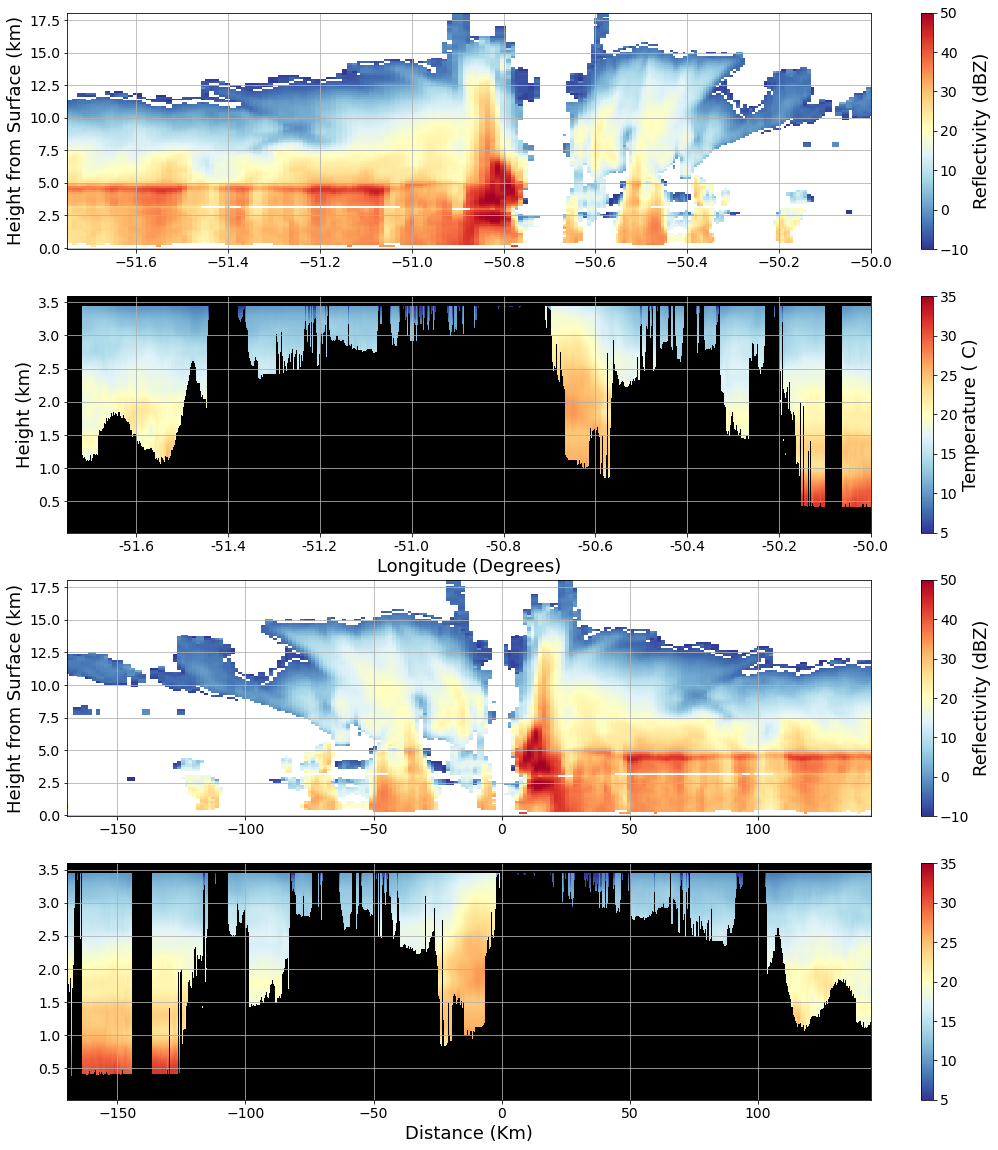

In [31]:
# comparing lat / lon crl and tdr plots to new distance plots!
plt.figure( figsize=(18,20))

plt.subplot(411)
make_plots.plot_tdr( metadata['tdr_path'], inbound_name, outbound_name, xtype)
# plt.xlim( [-50, -51.65])
plt.xlim( metadata[ 'xlims'][ dataset] )


# plot the new crl dataset
plt.subplot(412)
make_plots.plot_T( crl_path, crl_name, 0, len( new_crl.time) - 1, xtype)
plt.xlabel( 'Longitude (Degrees)')
# plt.xlim( [-50, -51.65])
plt.xlim( metadata[ 'xlims'][ dataset] )

plt.subplot( 413)
make_plots.plot_tdr( metadata['tdr_path'], inbound_name, outbound_name, 'dist')
if dist1 > dist2:
    plt.xlim( [dist2, dist1])
else:
    plt.xlim( [dist1, dist2])

plt.subplot( 414)
temp = new_crl.T.where( new_crl.T.values < 50).transpose()
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_distance, - new_crl.H, temp, cmap=color_map, vmin=5, vmax=35)
plt.colorbar()
ax = plt.gca()
ax.set_facecolor('k')
helper_fns.change_font_sizes()
plt.grid('on')
plt.xlabel( "Distance (Km)")
if dist1 > dist2:
    plt.xlim( [dist2, dist1])
else:
    plt.xlim( [dist1, dist2])

